In [1]:
from sklearn.svm import SVC
from datetime import datetime, timedelta
import sklearn.metrics as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_path = "../data/features_encoded.csv"
raw_data = pd.read_csv(input_path, header=0, skiprows=None, index_col=None, delimiter=",")

labels = raw_data['malicious'].apply(lambda x: 1 if x else 0)
features = raw_data.drop('malicious', axis=1)

train_features = features.iloc[:80000, :]
test_features = features.iloc[80000:, :]
train_labels = labels[:80000]
test_labels = labels[80000:]

In [3]:
def calculateNormalizationParams(data):
    means = data.mean()
    stdevs = data.std()
    stdevs[stdevs == 0] = 1  # Replace 0 std to avoid division by zero
    return means, stdevs

def applyNormalization(data, means, stdevs):
    return (data - means) / stdevs

In [4]:
means, stdevs = calculateNormalizationParams(train_features)
normalizedTrainFeatures = applyNormalization(train_features, means, stdevs)
normalizedTestFeatures = applyNormalization(test_features, means, stdevs)

In [5]:
best_c = 0.1
best_kernel = 'linear'
best_classifier = svc = SVC(C=best_c, kernel=best_kernel, random_state=0).fit(normalizedTrainFeatures,train_labels)
prev_predict = best_classifier.predict(normalizedTrainFeatures)

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

In [8]:
def acc(data, labels, C, kernel):
    global prev_predict,best_classifier,best_c,best_kernel
    t0 = datetime.now()
    svc = SVC(C=C, kernel=kernel, random_state=0).fit(data, labels)
    predictions = svc.predict(data)
    if(m.accuracy_score(labels,predictions) > m.accuracy_score(labels,prev_predict)):
        prev_predict = predictions
        best_classifier = svc
        best_c = C
        best_kernel = kernel
    tn = datetime.now() - t0
    tn = tn - timedelta(microseconds=tn.microseconds)
    return (C, kernel, m.accuracy_score(labels, predictions), tn)

In [10]:
C_vector = [0.1, 1, 10]
kernel_vector = ['linear', 'rbf']
scores = [acc(normalizedTrainFeatures, train_labels, C, kernel) for C in C_vector for kernel in kernel_vector]
for i, score in enumerate(scores):
    print("C = " + str(score[0]) + ", kernel = " + str(score[1]) + ", accuracy = " + str(score[2]) + ", t = " + str(score[3]))

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

C = 0.1, kernel = linear, accuracy = 0.6634125, t = 0:05:35
C = 0.1, kernel = rbf, accuracy = 0.8015375, t = 0:23:23
C = 1, kernel = linear, accuracy = 0.66405, t = 0:08:04
C = 1, kernel = rbf, accuracy = 0.884325, t = 0:07:31
C = 10, kernel = linear, accuracy = 0.66405, t = 0:32:37
C = 10, kernel = rbf, accuracy = 0.9106875, t = 0:06:56


In [11]:
x = [n[0] for n in scores]
y = [n[2] for n in scores]

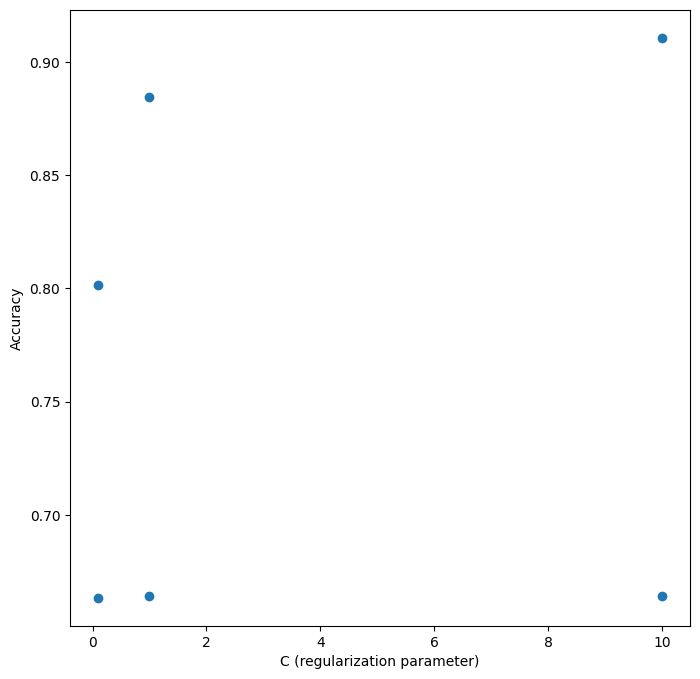

In [12]:
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot()
ax.scatter(x, y)
ax.set_xlabel('C (regularization parameter)')
ax.set_ylabel('Accuracy')
plt.show()

In [15]:
svc = SVC(C=best_c, kernel=best_kernel, random_state=0, probability=True).fit(normalizedTrainFeatures, train_labels)
predictions = svc.predict(normalizedTestFeatures)
probs = svc.predict_proba(normalizedTestFeatures)
probs = pd.DataFrame(probs)
probs = probs.apply(lambda x: max(x[0],x[1]), axis=1)

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

In [16]:
acc = m.accuracy_score(test_labels, predictions)
prec = m.precision_score(test_labels, predictions)
recall = m.recall_score(test_labels, predictions)
f1 = m.f1_score(test_labels,predictions)
auc = m.roc_auc_score(test_labels,probs)
print("Accuracy score: " + str(acc))
print("Precision score: " + str(prec))
print("Recall score: " + str(recall))
print("F1 score: ", f1)
print("AUC-ROC: ", auc)

Accuracy score: 0.9020548972551372
Precision score: 0.915805429240733
Recall score: 0.8313735301476107
F1 score:  0.8715494065962888
AUC-ROC:  0.6201237763085369


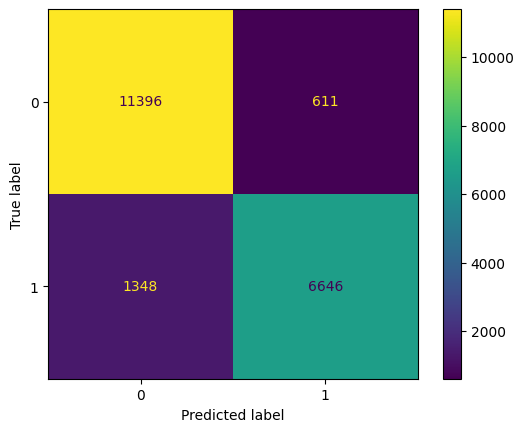

In [17]:
m.ConfusionMatrixDisplay(m.confusion_matrix(test_labels, predictions)).plot()

In [18]:
import pickle
with open('trained_models/svc.pkl','wb') as f:
    pickle.dump(svc,f)
print("Model dump complete!")

Model dump complete!
